In [57]:
pip install -e .

Obtaining file:///data/floatingobjects/floatingobjects/src/notebooks
ERROR: file:///data/floatingobjects/floatingobjects/src/notebooks does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import src

In [2]:
from src.data import get_region_split
from src.utils import load_convert_tiff, acquire_data
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
seed = 0
snapshot_path = "../models/unet-model_0.pth.tar"
region_splits_test = get_region_split(seed)["test"]
region_splits_test

['kentpointfarm_20180710',
 'accra_20181031',
 'tunisia_20180715',
 'sanfrancisco_20190219',
 'portalfredSouthAfrica_20180601']

In [4]:
for region_name in region_splits_test:
    os.system("python ../predictor.py --prediction-path" + \
        f" ../../predictions/pred_{region_name}.tif" + \
            f" --image-path '../../../../data/{region_name}.tif'" + \
                f" --snapshot-path {snapshot_path}")

/data/floatingobjects/floatingobjects/src/notebooks/../predictor.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, median_filter
/data/floatingobjects/floatingobjects/src/notebooks/../predictor.py:12: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, median_filter
/data/floatingobjects/floatingobjects/src/notebooks/../predictor.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, median_filter
/data/floatingobjects/floatingobjects/src/notebooks/../predictor.py:12: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndima

kentpointfarm_20180710
(1168, 1166, 1)


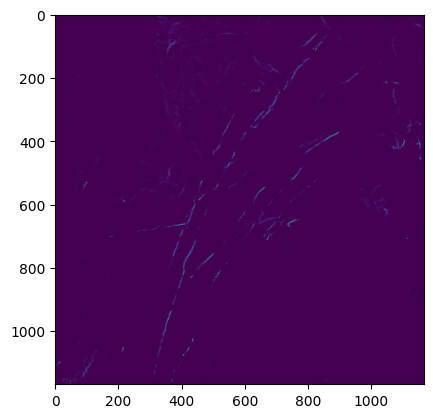

accra_20181031
tunisia_20180715
(1511, 1975, 1)


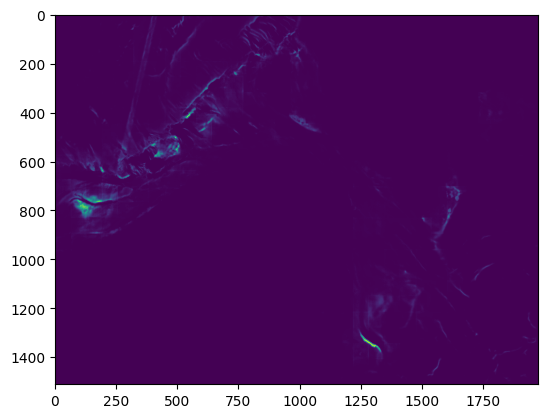

sanfrancisco_20190219
(3405, 3503, 1)


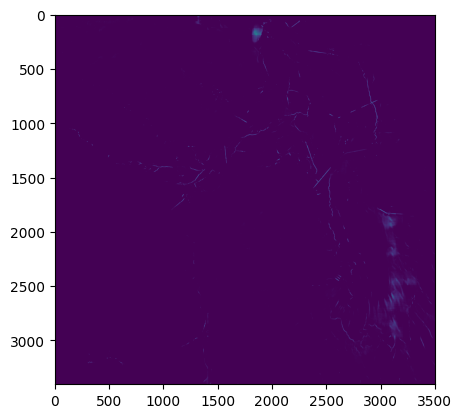

portalfredSouthAfrica_20180601
(5413, 4767, 1)


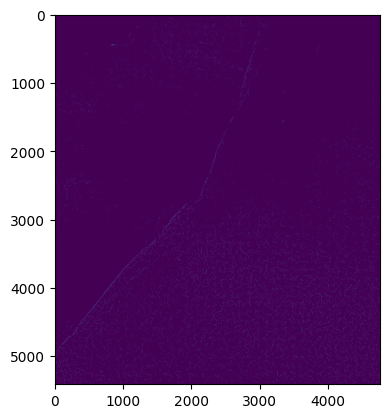

In [9]:
path = "../../predictions/"
ext = ".tif"


for region_name in region_splits_test:
    try:
        print(region_name)
        img, _ = acquire_data(
            path + "pred_" + region_name + ext + "/" + region_name + ext)
        plt.imshow(img)
        print(img.shape)
        plt.show()
    except:
        pass
    